In [2]:
import pandas as pd
from env import host, username, password
import prepare
import wrangle
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
import explore
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [3]:
wrangle.read_csv_file()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
...,...,...,...,...,...,...,...
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152860,0.0,0.0,NaN,208057.0,NaN,5783.88,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [4]:
df = wrangle.read_csv_file()

In [5]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [6]:
prepare.split_data(df)

(         bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  \
 1228108         3.0          2.0                        1350.0   
 99712           3.0          1.0                        1048.0   
 1489629         2.0          1.0                         754.0   
 730173          4.0          1.5                        1248.0   
 579338          2.0          1.0                        1147.0   
 ...             ...          ...                           ...   
 1164599         3.0          3.0                        1998.0   
 841555          3.0          2.0                        1264.0   
 943078          4.0          3.0                        2403.0   
 1486320         3.0          2.0                        1443.0   
 1917476         3.0          1.0                        1386.0   
 
          taxvaluedollarcnt  yearbuilt  taxamount    fips  
 1228108           368552.0     1971.0    4323.38  6111.0  
 99712             445000.0     1935.0    5611.39  6037.0  
 1489629      

In [7]:
train, validate, test = prepare.split_data(df)

print("Train Head:")
print(train.head())

print("Validate Size:", validate.shape[0])
print("Test Size:", test.shape[0])


Train Head:
         bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  \
1228108         3.0          2.0                        1350.0   
99712           3.0          1.0                        1048.0   
1489629         2.0          1.0                         754.0   
730173          4.0          1.5                        1248.0   
579338          2.0          1.0                        1147.0   

         taxvaluedollarcnt  yearbuilt  taxamount    fips  
1228108           368552.0     1971.0    4323.38  6111.0  
99712             445000.0     1935.0    5611.39  6037.0  
1489629            91912.0     1952.0    1681.97  6037.0  
730173             57374.0     1962.0     899.08  6059.0  
579338            498000.0     1952.0    5950.70  6059.0  
Validate Size: 430573
Test Size: 430573


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1291717 entries, 1228108 to 1917476
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    1291708 non-null  float64
 1   bathroomcnt                   1291708 non-null  float64
 2   calculatedfinishedsquarefeet  1286582 non-null  float64
 3   taxvaluedollarcnt             1291437 non-null  float64
 4   yearbuilt                     1286040 non-null  float64
 5   taxamount                     1289078 non-null  float64
 6   fips                          1291717 non-null  float64
dtypes: float64(7)
memory usage: 78.8 MB


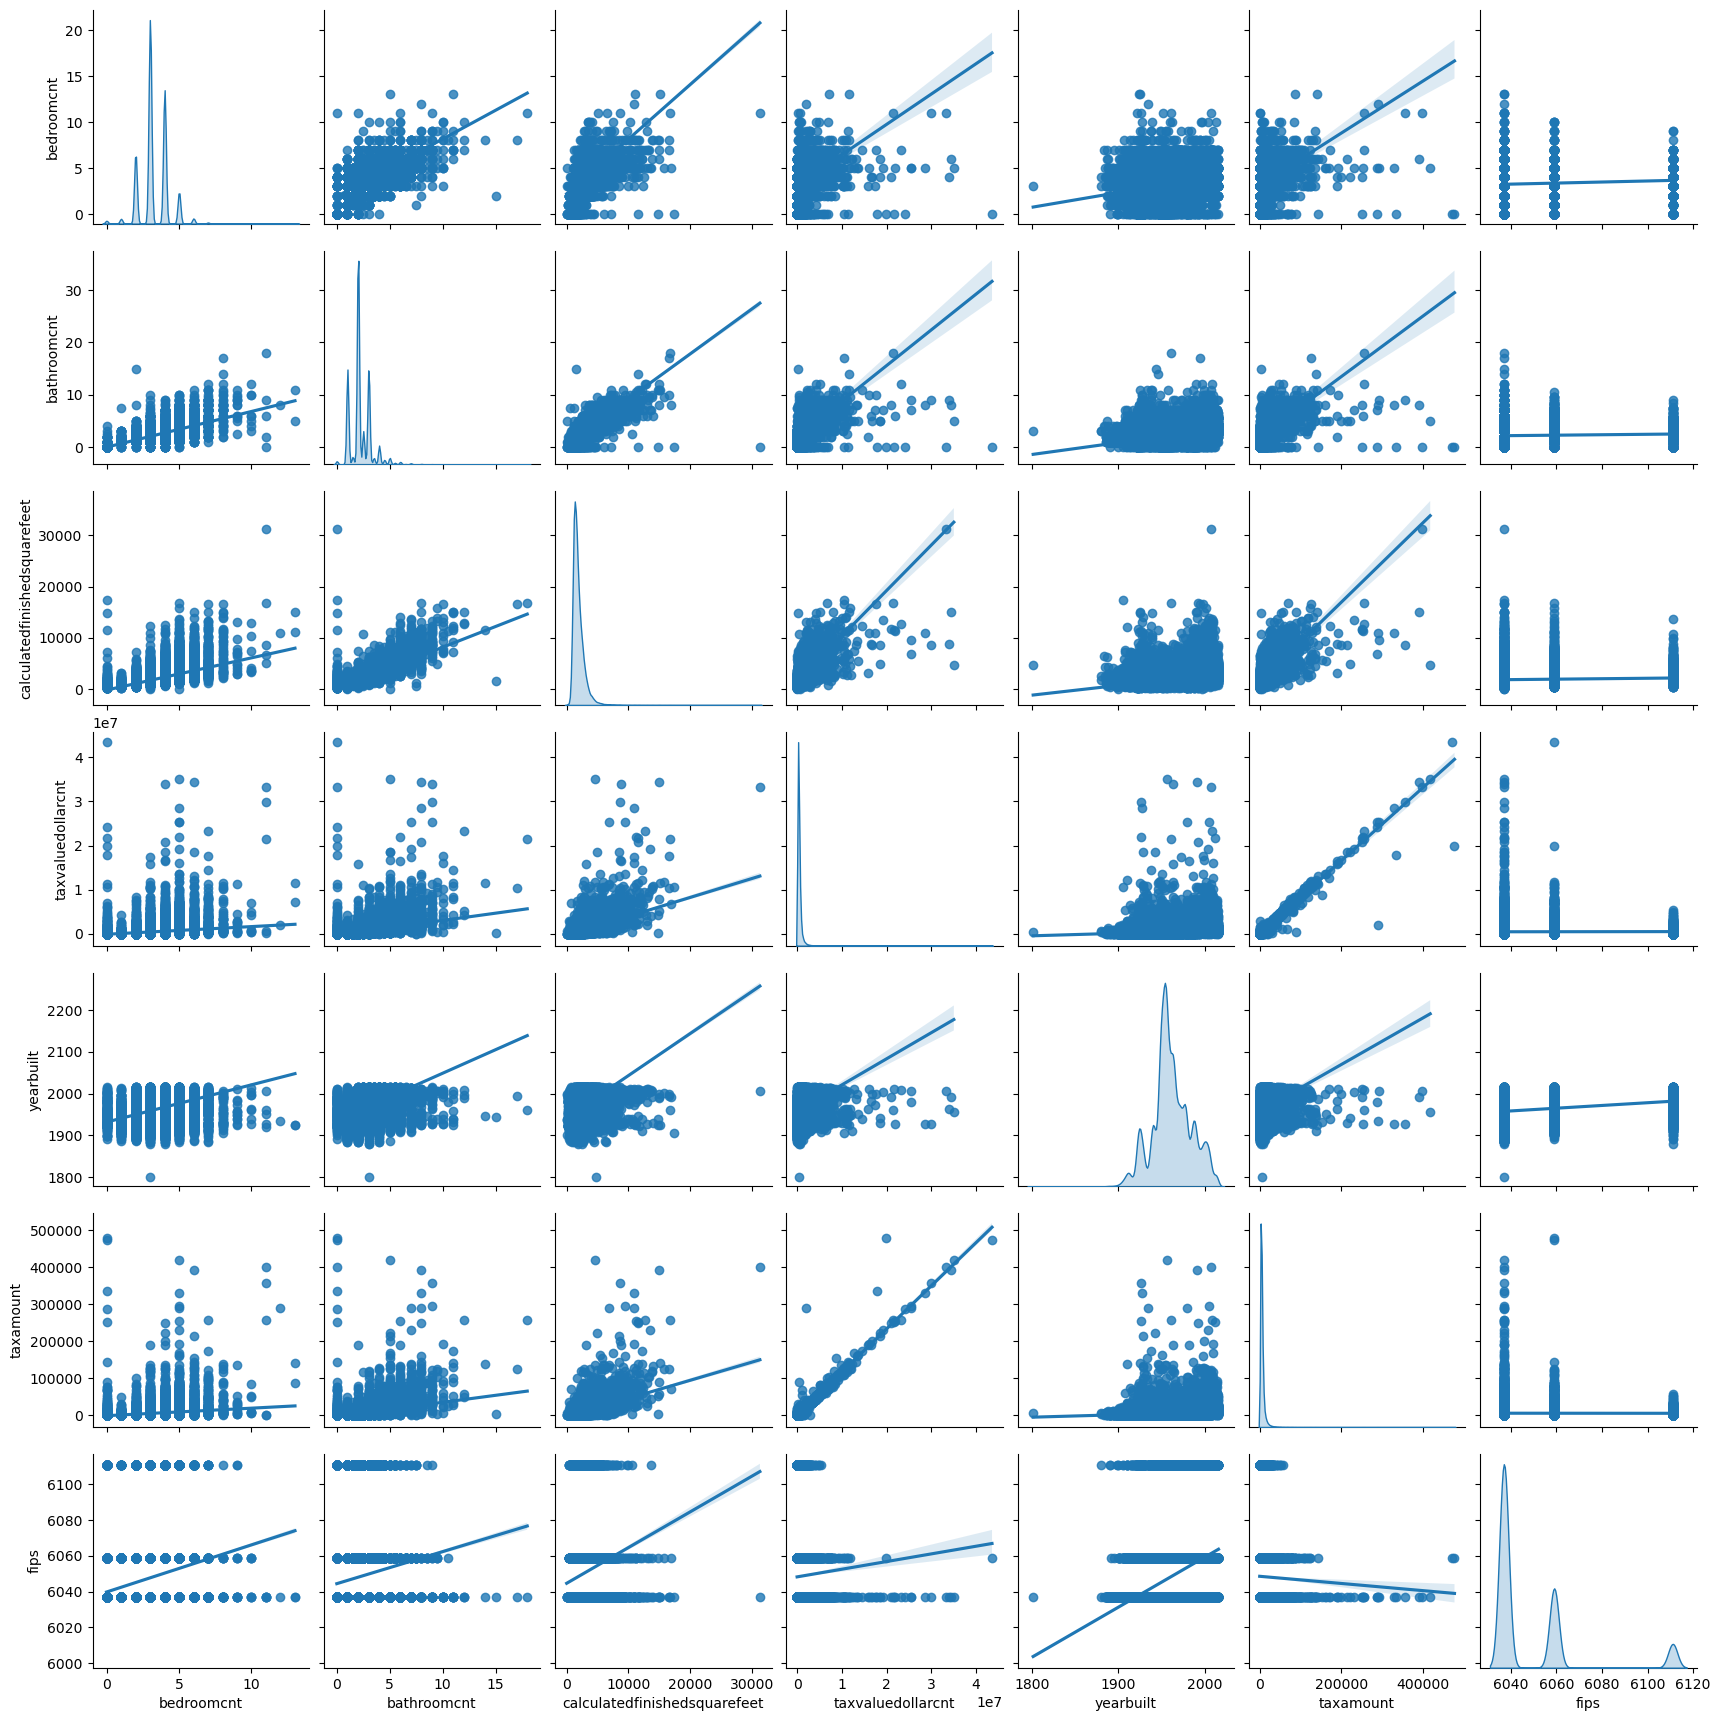

In [9]:
# Visualize all combinations of variables in some way
explore.plot_variable_pairs(train.sample(100000))

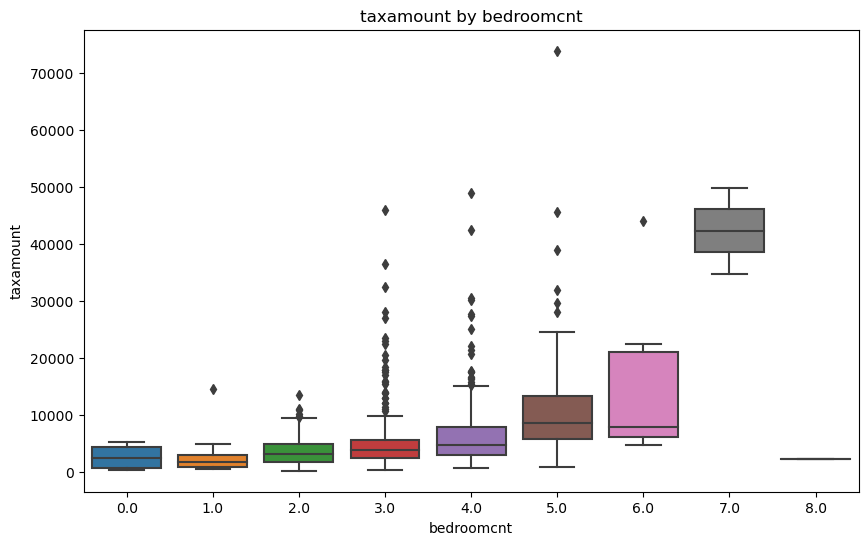

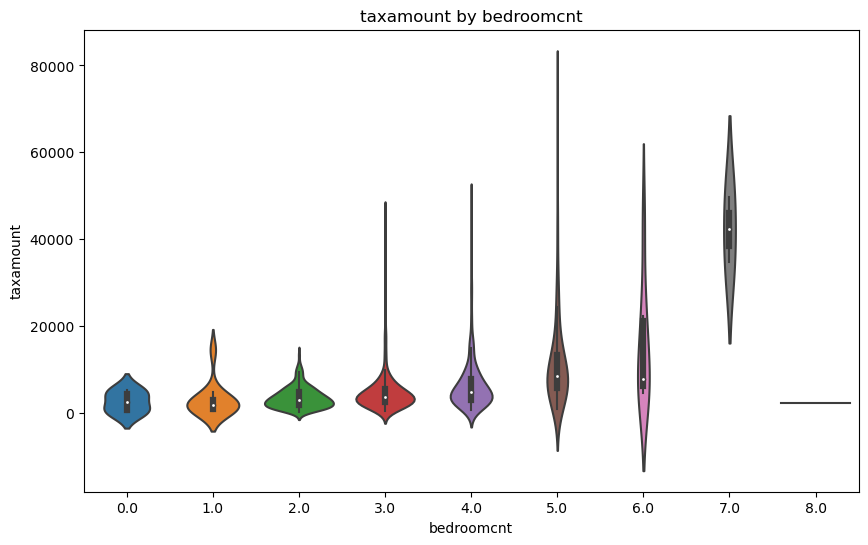

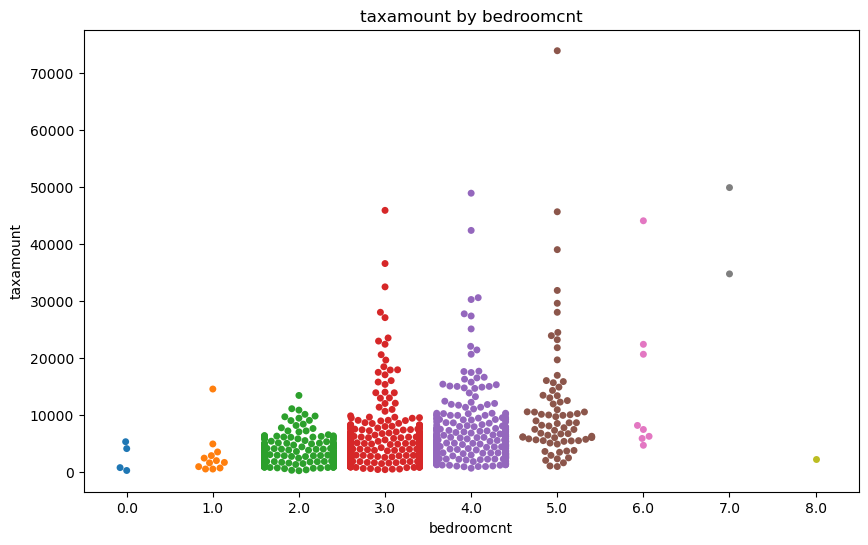

In [10]:
explore.plot_categorical_and_continuous_vars(train.sample(1000), 'bedroomcnt', 'taxamount')

Come up with some initial hypotheses based on your goal of predicting property value.

My initial hypotheses is that bedroomcount have a direct correlation with property value predictions

fips will have a strong correlation with propery value predictions

Tax amount will have a direct correlation with propery value predictions

Tax amount will be higher in certain counties aka fips.

Calculatedfinishedsquarefeet will have a direct correlation with taxvaluedollarcnt

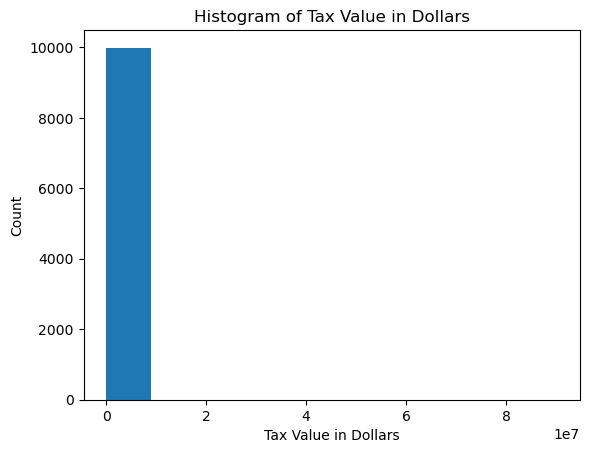

In [11]:

# Histogram of the tax value in dollars
plt.hist(train.sample(10000)['taxvaluedollarcnt'], bins=10)
plt.xlabel('Tax Value in Dollars')
plt.ylabel('Count')
plt.title('Histogram of Tax Value in Dollars')
plt.show()


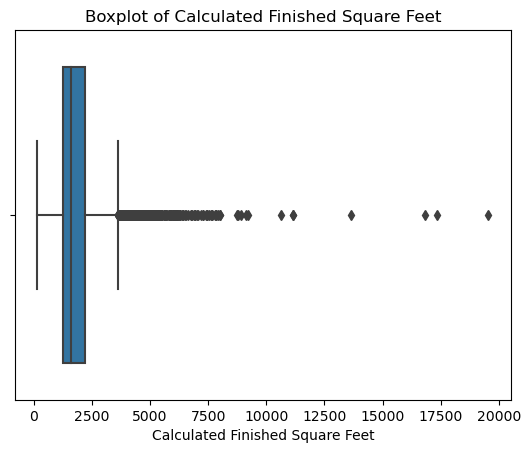

In [12]:
# Boxplot of the calculated finished square footage
sns.boxplot(x=train.sample(10000)['calculatedfinishedsquarefeet'])
plt.xlabel('Calculated Finished Square Feet')
plt.title('Boxplot of Calculated Finished Square Feet')
plt.show()

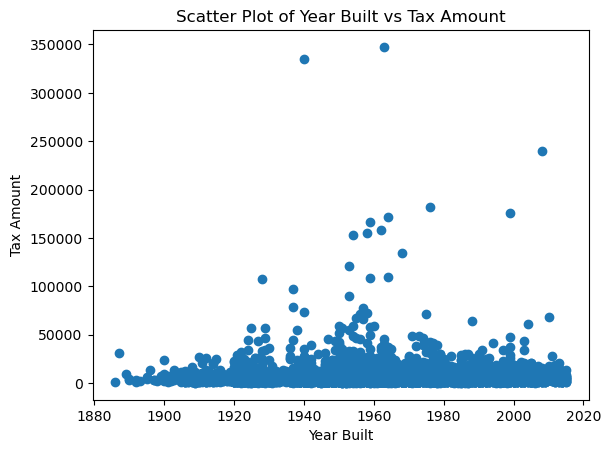

In [13]:
# Scatter plot of the year built vs the tax amount
plt.scatter(train.sample(10000)['yearbuilt'], train.sample(10000)['taxamount'])
plt.xlabel('Year Built')
plt.ylabel('Tax Amount')
plt.title('Scatter Plot of Year Built vs Tax Amount')
plt.show()

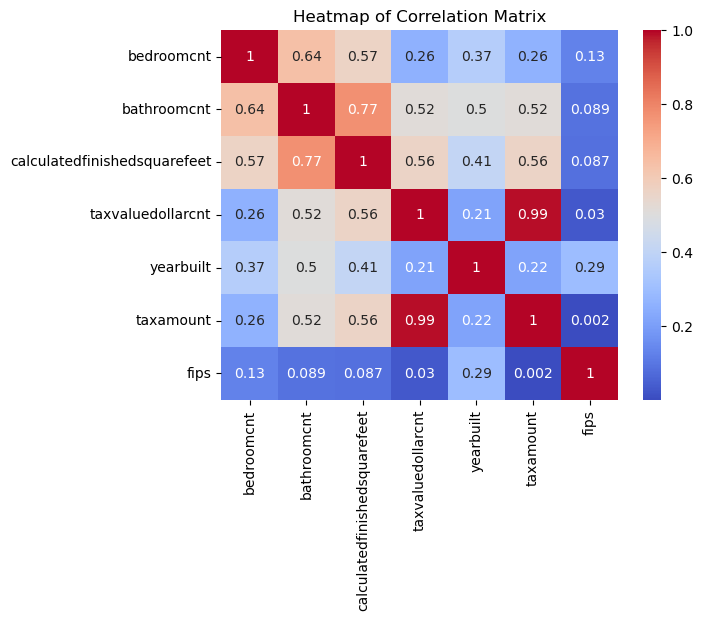

In [14]:

# Heatmap of the correlation matrix
sns.heatmap(train.sample(10000).corr(), cmap='coolwarm', annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()


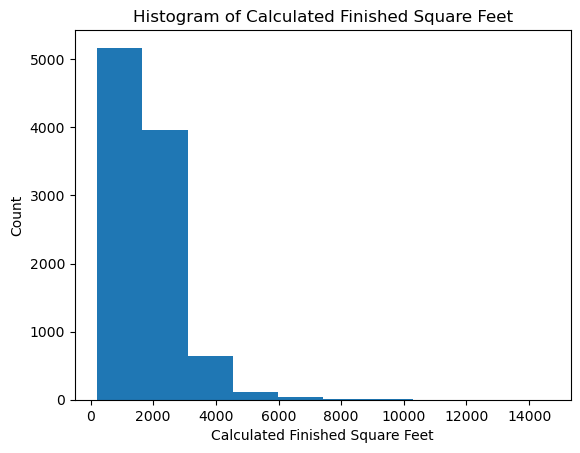

In [15]:
# Histogram of the calculated finished square footage
plt.hist(train.sample(10000)['calculatedfinishedsquarefeet'], bins=10)
plt.xlabel('Calculated Finished Square Feet')
plt.ylabel('Count')
plt.title('Histogram of Calculated Finished Square Feet')
plt.show()


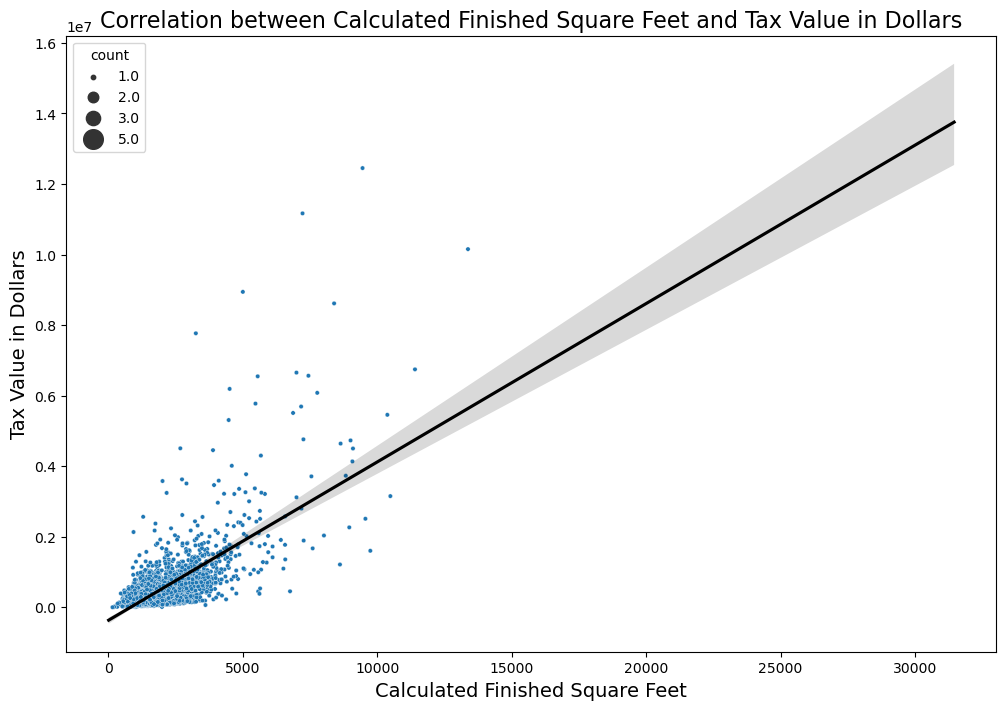

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns

# Create a larger figure with subplots
fig, ax = plt.subplots(figsize=(12,8))

# Create a scatter plot with calculated finished square feet on the x-axis, tax value in dollars on the y-axis, and a color gradient based on the density of the data points
sns.scatterplot(data=train.sample(100000), x='calculatedfinishedsquarefeet', y='taxvaluedollarcnt', hue=None, size=train.sample(100000).groupby(['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']).size().reset_index(name='count')['count'], sizes=(10, 200), palette='YlOrRd', ax=ax)

# Add a regression line to show the trend between the two variables
sns.regplot(data=train.sample(100000), x='calculatedfinishedsquarefeet', y='taxvaluedollarcnt', scatter=False, color='black', ax=ax)

# Add axis labels and a title
ax.set_xlabel('Calculated Finished Square Feet', fontsize=14)
ax.set_ylabel('Tax Value in Dollars', fontsize=14)
ax.set_title('Correlation between Calculated Finished Square Feet and Tax Value in Dollars', fontsize=16)

# Show the plot
plt.show()

Text(0, 0.5, 'Bedroom Count')

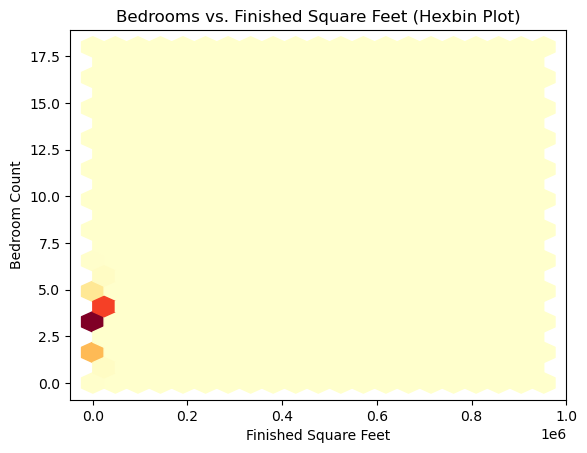

In [17]:

import matplotlib.pyplot as plt

# Create a hexbin plot
plt.hexbin(x='calculatedfinishedsquarefeet', y='bedroomcnt', data=train, gridsize=20, cmap='YlOrRd')

# Add a title and axis labels
plt.title('Bedrooms vs. Finished Square Feet (Hexbin Plot)')
plt.xlabel('Finished Square Feet')
plt.ylabel('Bedroom Count')

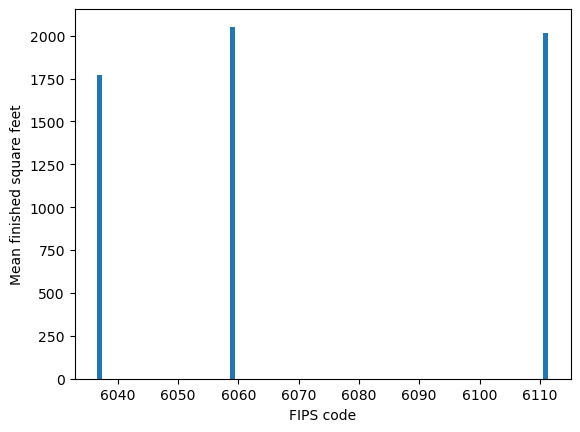

t-statistic: nan
p-value: nan
Fail to reject null hypothesis. There is no significant difference in the mean finished square feet between different FIPS codes.


In [21]:

from scipy import stats
# Define null and alternative hypotheses
null_hypothesis = "There is no significant difference in the mean finished square feet between different FIPS codes."
alt_hypothesis = "There is a significant difference in the mean finished square feet between different FIPS codes."

# Group data by FIPS code and calculate mean finished square feet for each group
grouped_data = train.groupby('fips')['calculatedfinishedsquarefeet'].mean()

# Plot a bar chart to visualize the mean finished square feet for each FIPS code
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('FIPS code')
plt.ylabel('Mean finished square feet')
plt.show()

# Perform a t-test to determine if the mean finished square feet for different FIPS codes are significantly different
t_stat, p_value = stats.ttest_ind(train.loc[df['fips'] == 6037, 'calculatedfinishedsquarefeet'], 
                                  train.loc[df['fips'] == 6111, 'calculatedfinishedsquarefeet'])

# Interpret the results of the t-test
alpha = 0.05 # significance level
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.2f}")
if p_value < alpha:
    print(f"Reject null hypothesis. {alt_hypothesis}")
else:
    print(f"Fail to reject null hypothesis. {null_hypothesis}")

In [ ]:
wrangle.prep_zillow(df)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [ ]:
df = wrangle.prep_zillow(df)

In [ ]:
df

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [ ]:
prepped_zillow = wrangle.prep_zillow(df)

In [ ]:
prepped_zillow

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [ ]:
train,validate,test = wrangle.split_data(prepped_zillow)

In [ ]:
train

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1268902,4.0,2.0,2235.0,377671.0,1977.0,4175.02,6059.0
613034,3.0,2.5,1975.0,687000.0,1967.0,7097.42,6059.0
2040503,4.0,2.0,1796.0,625494.0,1963.0,11386.63,6037.0
2045869,3.0,2.5,2607.0,557360.0,2000.0,6353.84,6111.0
744180,4.0,2.0,1792.0,205082.0,1957.0,2579.19,6037.0
...,...,...,...,...,...,...,...
941799,2.0,1.0,696.0,27699.0,1954.0,918.71,6037.0
631585,3.0,3.0,2081.0,619590.0,1987.0,7319.49,6037.0
883917,3.0,2.0,1742.0,196237.0,1957.0,2512.91,6037.0
1253096,4.0,3.0,2066.0,617344.0,1924.0,7650.55,6037.0


In [ ]:
scaled = wrangle.min_max_scaler(train)

In [ ]:
scaled

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1268902,0.266667,0.062500,0.002345,0.004187,0.818605,0.003867,0.297297
613034,0.200000,0.078125,0.002072,0.007617,0.772093,0.006577,0.297297
2040503,0.266667,0.062500,0.001884,0.006935,0.753488,0.010556,0.000000
2045869,0.200000,0.078125,0.002736,0.006180,0.925581,0.005888,1.000000
744180,0.266667,0.062500,0.001880,0.002274,0.725581,0.002386,0.000000
...,...,...,...,...,...,...,...
941799,0.133333,0.031250,0.000730,0.000307,0.711628,0.000846,0.000000
631585,0.200000,0.093750,0.002184,0.006870,0.865116,0.006783,0.000000
883917,0.200000,0.062500,0.001828,0.002176,0.725581,0.002325,0.000000
1253096,0.266667,0.093750,0.002168,0.006845,0.572093,0.007090,0.000000


In [ ]:
train, validate, test = wrangle.split_data(scaled)

In [ ]:

import scipy.stats as stats

# Set up the variables for the test
x = train['calculatedfinishedsquarefeet']
y = train['taxvaluedollarcnt']

# Perform the test
corr, p_value = stats.pearsonr(x, y)

# Print the results
print(f'Pearson correlation coefficient: {corr:.3f}')
print(f'P-value: {p_value:.3f}')

# Set up the hypotheses
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')


# In this example, we import the `scipy.stats` module to perform the Pearson correlation coefficient test.
#  We set up the variables `x` and `y` as the two variables we want to test. We use the `stats.pearsonr()` 
# function to perform the test and get the correlation coefficient and p-value. We then print the results 
# and set up the hypotheses using an alpha value of 0.05. Finally, we determine whether to reject or fail to reject
#  the null hypothesis based on the p-value.

# The null hypothesis for this test is that there is no significant correlation between `taxvaluedollarcnt` and
#  `calculatedfinishedsquarefeet`. If the p-value is less than the chosen alpha level (0.05 in this case), 
# we reject the null hypothesis and conclude that there is a significant correlation between the two variables.
#  If the p-value is greater than the alpha level, we fail to reject the null hypothesis and conclude that there is
#  not a significant correlation between the two variables.

Pearson correlation coefficient: 0.378
P-value: 0.000
Reject the null hypothesis


The Pearson correlation coefficient test says we should reject the null hypothesis, which means there is a significant correlation between bedrooms and taxvaluedollarcnt.

In [ ]:

from scipy.stats import f_oneway

# Separate the data by fips value
fips_6037 = df[df['fips'] == 6037]['taxvaluedollarcnt']
fips_6059 = df[df['fips'] == 6059]['taxvaluedollarcnt']
fips_6111 = df[df['fips'] == 6111]['taxvaluedollarcnt']

# Perform the ANOVA test
stat, p = f_oneway(fips_6037, fips_6059, fips_6111)

# Print the results
print('ANOVA Test Results')
print(f'F-statistic: {stat:.4f}')
print(f'p-value: {p:.4f}')


ANOVA Test Results
F-statistic: 3533.2007
p-value: 0.0000


Null hypothesis: The mean `taxvaluedollarcnt` is the same for all values of `fips`.

Alternative hypothesis: The mean `taxvaluedollarcnt` is significantly different for at least one value of `fips`.

Text(0, 0.5, 'taxvaluedollarcnt')

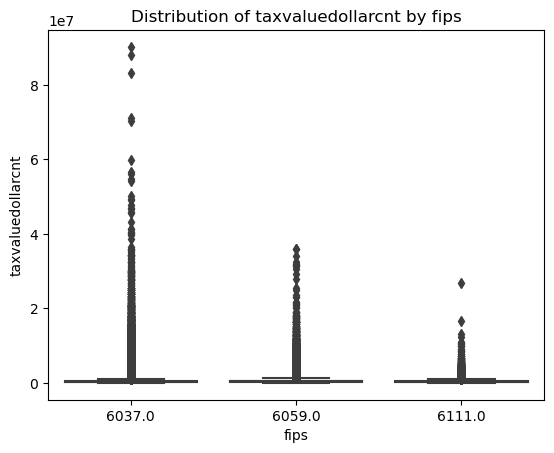

In [ ]:

import seaborn as sns

# Create a box plot for each fips value
sns.boxplot(x='fips', y='taxvaluedollarcnt', data=df)

# Add a title and axis labels
plt.title('Distribution of taxvaluedollarcnt by fips')
plt.xlabel('fips')
plt.ylabel('taxvaluedollarcnt')


We reject the null hypothosis.  Fips (cou) does have a significant correlation to taxvaluedollarscnt.

(FIPS) Five digit number of which the first two are the FIPS code of the state to which the county belongs. Leading 0 is removed from the data: 6037=Los Angeles County, 6059=Orange County, 6111=Ventura County

We see that LA County tax value is considerably higher.

Text(0.5, 1.05, 'Pairwise Relationships between Bedroom Count, Bathroom Count, and Finished Square Feet')

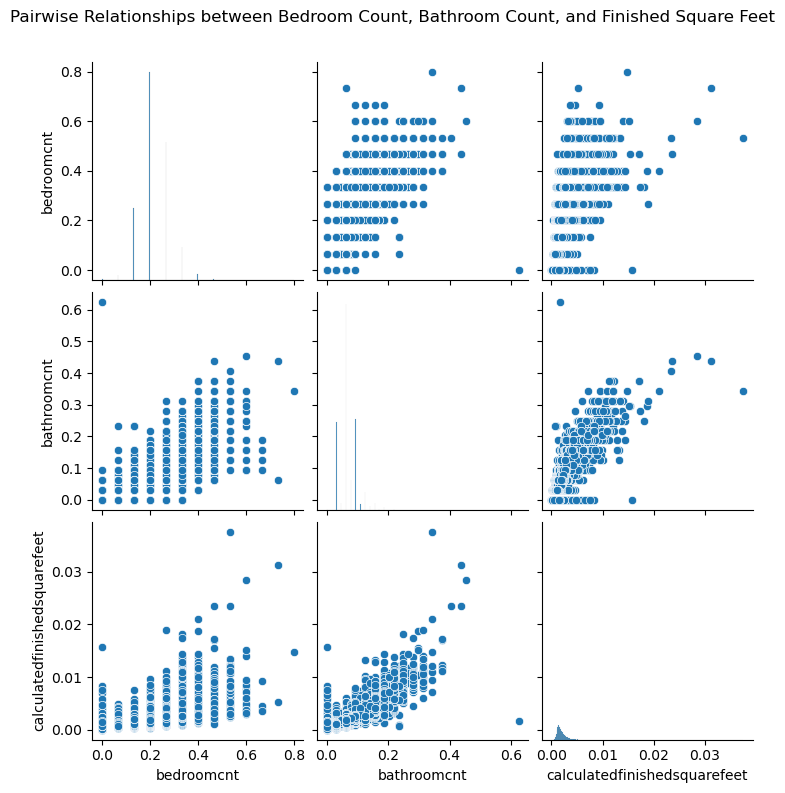

In [ ]:
# Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?


# Create a scatter plot matrix
sns.pairplot(data=train.sample(100000), vars=['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet'])

# Add a title
plt.suptitle('Pairwise Relationships between Bedroom Count, Bathroom Count, and Finished Square Feet', y=1.05)


Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

Los Angeles county will have the highest tax rate on homes but may not mean the home value will actually be higher. I think calculatedfinishedsquarefeet, and fips will have a lot to do with predicting the home value accurately. 